In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [7]:
Conn= sqlite3.connect('inventory.db')

In [73]:
#fetching vendor summary data
df = pd.read_sql_query('SELECT * FROM vendor_sales_summary',Conn)
df.to_csv('vendor_sales_summary.csv', index=False)
df.head()

,VendorNumber,VendorName,Brand,Description,Actual_price,PurchasePrice,Volume,Total_purchaseQuantity,Total_purchaseDollars,Totalsales_quantity,Totalsales_price,Totalsales_Dollars,Total_Excisetax,Total_Freightcost,GrossProfit,Profitmargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,33.864673,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,26.682999,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,32.759433,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,37.249347,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,39.689707,0.983556,1.396897


In [9]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
Actual_price,10692.0,35.643671,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
Total_purchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
Total_purchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Totalsales_quantity,10692.0,3077.482136,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
Totalsales_price,10692.0,18793.783627,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
Totalsales_Dollars,10692.0,42239.074419,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


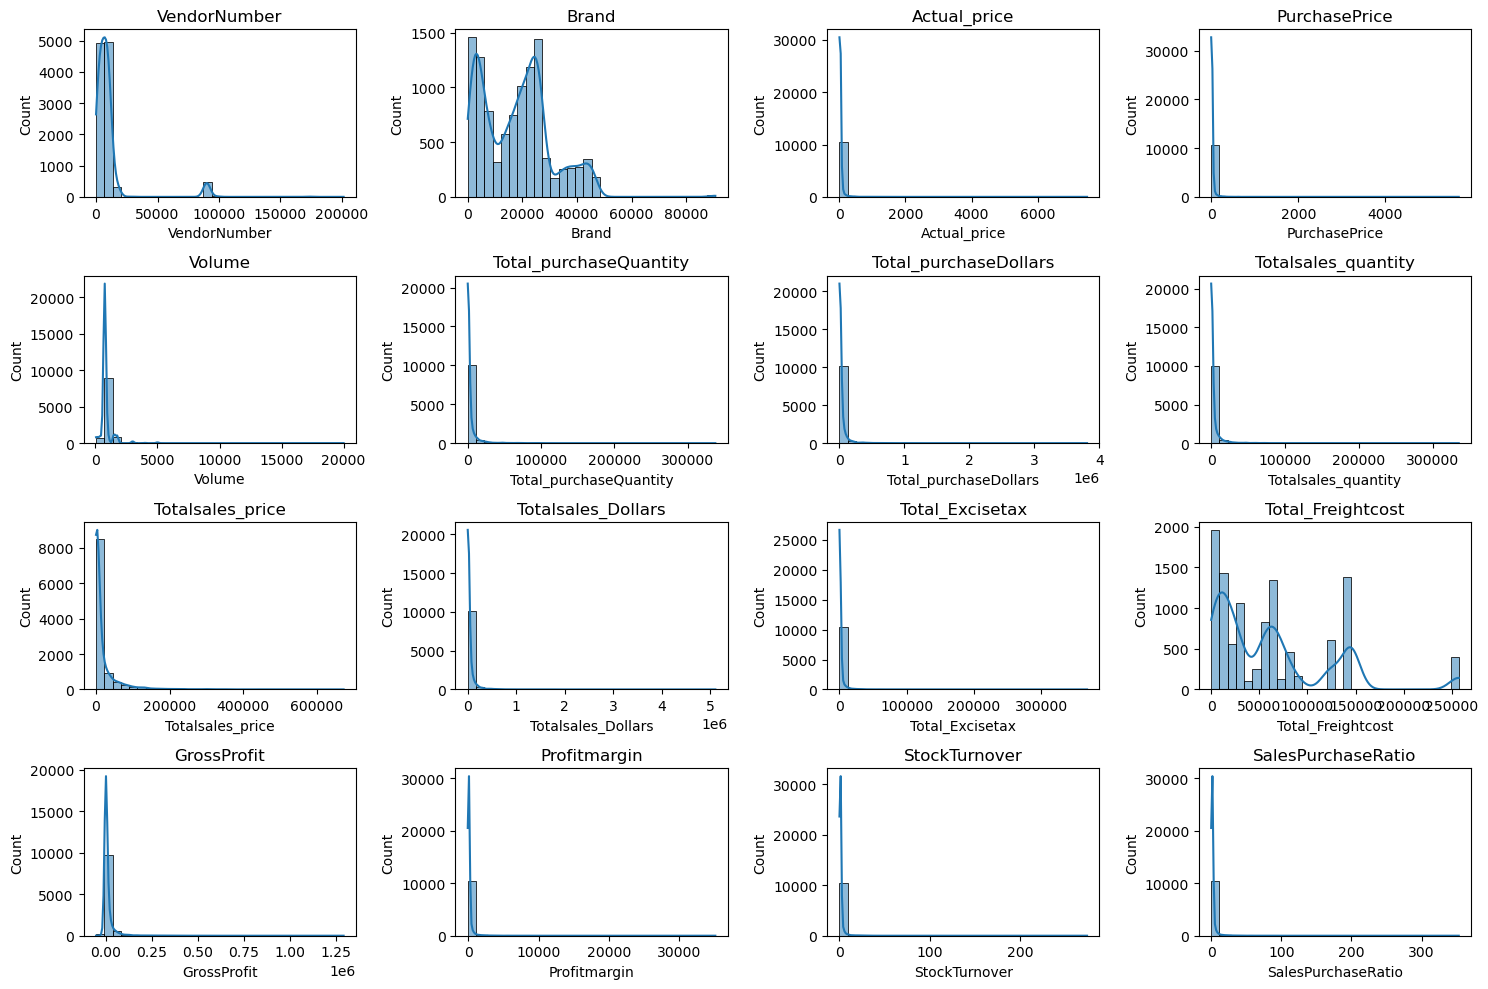

In [10]:
#Distribution plots for numerical columns
numerical_col = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) #adjusting grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insight:
Negative and Zero values:
-Gross profit minimum value is -52002.78 indicating losses. Some products or transactions may be selling at a loss due to 
high cost or sellings at discount lower than the purchase price.
- Profit  margin has a minimum of -∞ which suggests cases where revenue is zero or even lower than costs
- Total sales quantity and sales dollar minimum values are 0 which means some products were purchased but never sold.

# Outliers indicated by high standard deviations:
- The max value of purchase and actual prices (5,681.81 and 7,499.99) are significantly higher than mean(24.39 and 35.64)
  indicating potential premium products.
- Freight cost huge variation 0.09 to 257,032.07 suggests logistic inefficiencies or bulk shipments.
- Stock turnover ranges from 0 to 274.5 implying some products sell extremely fast while others remain in stock indefinitely.



In [11]:
#filter out the data by removing inconsistencies
df = pd.read_sql_query('''SELECT * 
      FROM vendor_sales_summary
      WHERE GrossProfit > 0
      and Profitmargin > 0
      and Totalsales_quantity > 0''',Conn)
df

,VendorNumber,VendorName,Brand,Description,Actual_price,PurchasePrice,Volume,Total_purchaseQuantity,Total_purchaseDollars,Totalsales_quantity,Totalsales_price,Totalsales_Dollars,Total_Excisetax,Total_Freightcost,GrossProfit,Profitmargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,33.864673,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,26.682999,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,32.759433,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,37.249347,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,39.689707,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,1.32,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,504.166667,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,0.39,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,2705.982906,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,0.74,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,33.783784,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,1.47,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,9646.938776,72.000000,97.469388


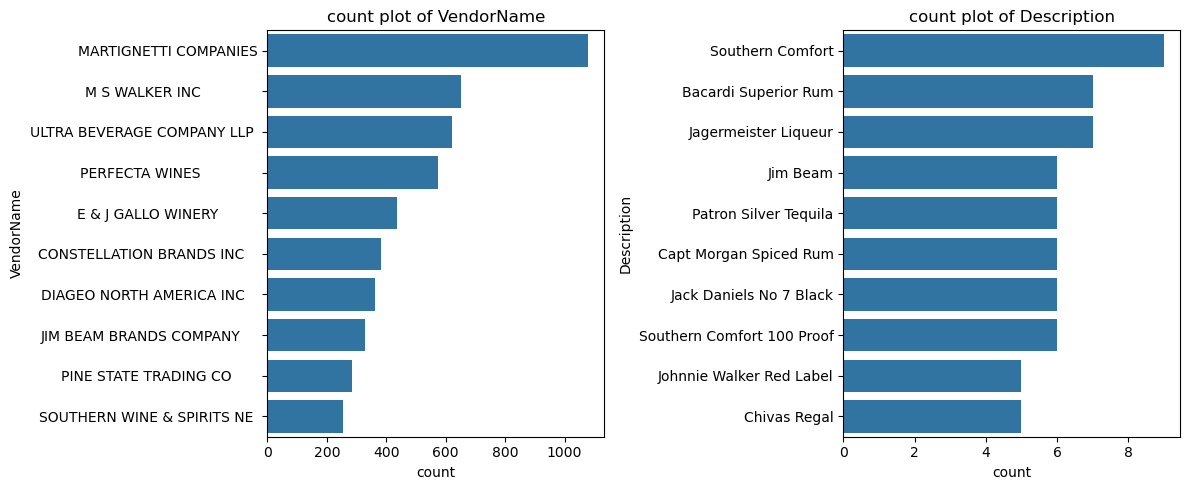

In [12]:
#Count plots for categorical columns
categorical_cols = ["VendorName","Description"] #"Description"
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1) #adjusting grid layout as needed
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # top 10 categories
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

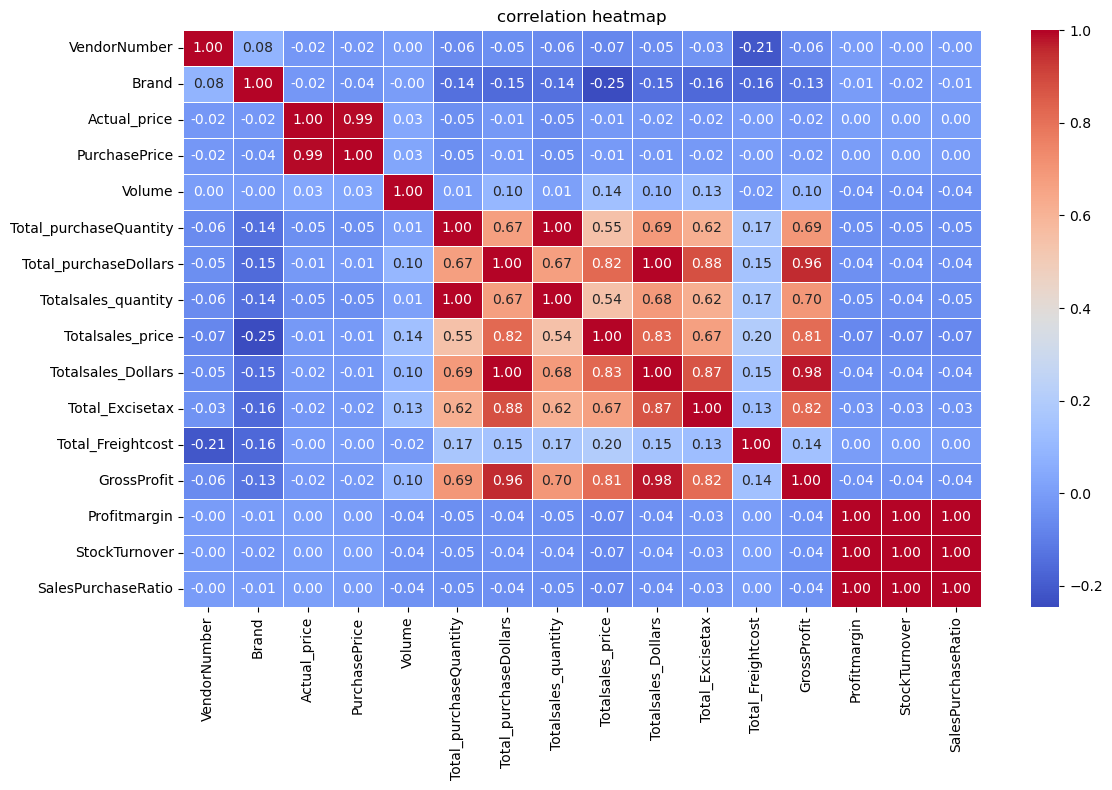

In [13]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_col].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5) # top 10 categories
plt.title('correlation heatmap')
plt.tight_layout()
plt.show()

# Correlation insights:
-- Purchase price has weak correlation with TotalSalesDollar(-0.012) and GrossProfit(-0.016) suggesting that price variations
do not significantly impact sales revenue or profit.
-- Strong correlation between TotalPurchaseQuantity and TotalSalesQuantity(0.999) confirming efficient inventory turnover.
-- Negative correlation between profit margin and total sales price(-0.179) suggests that as sales price increases margin decreases possibly due to compitative pricing pressure
-- Stock Turnover has negative correlation with both gross profit(-0.038) and profit margin(-0.055)indicating that faster turnover does not necessariliy result in higher profitabiity.

# DATA ANALYSIS
--Q1 Identify brands that promotional or pricing adjustments which exhibits lower sales performance
but higher profit margins?

In [14]:
brand_performance = df.groupby ("Description").agg({
"Totalsales_Dollars":'sum',
"Profitmargin":'mean'}).reset_index()

In [15]:
low_threshold =brand_performance['Totalsales_Dollars'].quantile(0.15)
print(low_threshold )

560.299


In [16]:
hight_margin_threshold =brand_performance['Profitmargin'].quantile(0.85)
print (hight_margin_threshold)

193.9320461403933


In [17]:
#Filter out brands with less sales but high profit margin
target_brands = brand_performance[
    (brand_performance['Totalsales_Dollars'] <= low_threshold) &
    (brand_performance['Profitmargin'] >= hight_margin_threshold)
]
print("Brands with low sales but high profit margin")
target_brands

Brands with low sales but high profit margin


,Description,Totalsales_Dollars,Profitmargin
6,12 Days of Pearls Gift Set,309.69,4207.232267
45,4 Orange Vodka,483.78,609.354839
57,A Bichot Clos Marechaudes,539.94,209.989666
59,A Bichot Merc Champs M,515.88,1735.871886
96,Absolut Orient Apple Vodka,119.94,709.858204
...,...,...,...
7588,Woodford Rsv Master Coll Pnt,489.95,281.106098
7663,Zardetto Pros di Coneg Brut,345.86,789.557613
7677,Zerran Tinto Montsant,139.91,346.283892
7686,Zhenka Vodka 80 Proof,240.39,687.647444


In [18]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [19]:
#Q2which vendors demonstrate the highest sales performance
top_vendor =df.groupby('VendorName')['Totalsales_Dollars'].sum().nlargest(10)
top_brands =df.groupby('Description')['Totalsales_Dollars'].sum().nlargest(10)
top_vendor

VendorName
DIAGEO NORTH AMERICA INC       67990099.42
MARTIGNETTI COMPANIES          39276398.80
PERNOD RICARD USA              32063196.19
JIM BEAM BRANDS COMPANY        31423020.46
BACARDI USA INC                24854817.14
CONSTELLATION BRANDS INC       24218745.65
E & J GALLO WINERY             18399899.46
BROWN-FORMAN CORP              18247230.65
ULTRA BEVERAGE COMPANY LLP     16502544.31
M S WALKER INC                 14706458.51
Name: Totalsales_Dollars, dtype: float64

In [20]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: Totalsales_Dollars, dtype: object

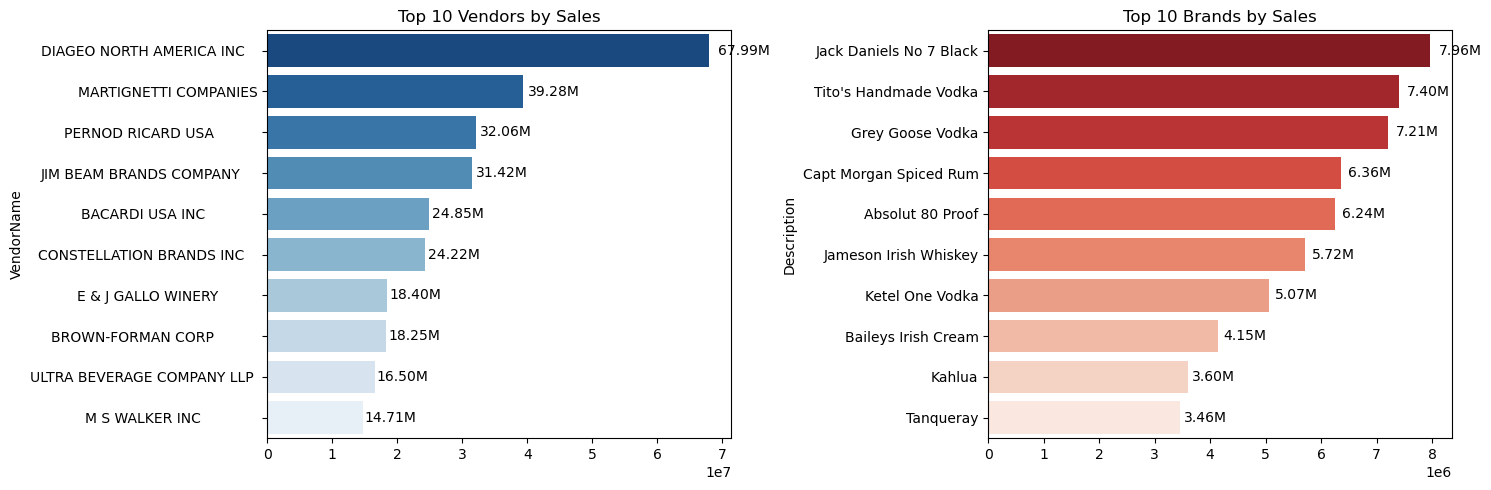

In [33]:
plt.figure(figsize=(15, 5))

# Plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendor.index, x=top_vendor.values, palette='Blues_r')
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette='Reds_r')
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + bar.get_width() * 0.02,
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [ ]:
#Q3which vendor contribute the most to total purchase dollars?
vendor_performance = df.groupby('VendorName').agg({
    'Totalsales_Dollars':'sum',
    'GrossProfit':'sum',
    'Total_purchaseDollars':'sum'

}).reset_index()

In [35]:
vendor_performance['PurchaseContribution%'] = vendor_performance['Total_purchaseDollars']/vendor_performance['Total_purchaseDollars'].sum()

In [41]:
vendor_performance =round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)

In [43]:
#Display top 10 vendors
top_vendor  = vendor_performance.head(10)
top_vendor['Totalsales_Dollars']=top_vendor['Totalsales_Dollars'].apply(format_dollars)
top_vendor['Total_purchaseDollars']= top_vendor['Total_purchaseDollars'].apply(format_dollars)
top_vendor['GrossProfit']= top_vendor['GrossProfit'].apply(format_dollars)
top_vendor

,VendorName,Totalsales_Dollars,GrossProfit,Total_purchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,0.16
57,MARTIGNETTI COMPANIES,39.28M,13.81M,25.46M,0.08
69,PERNOD RICARD USA,32.06M,8.21M,23.85M,0.08
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,0.08
6,BACARDI USA INC,24.85M,7.42M,17.43M,0.06
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,0.05
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,0.04
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,0.04
107,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,0.04
53,M S WALKER INC,14.71M,4.94M,9.76M,0.03


In [44]:
vendor_performance.shape

(120, 5)

In [45]:
top_vendor['PurchaseContribution%'].sum()

np.float64(0.6600000000000001)

In [46]:
#Q4 How much procurement is dependent on the top vendors?
print (f"Total purchase contribution of top vendors is {round(top_vendor['PurchaseContribution%'].sum(),2)}%")

Total purchase contribution of top vendors is0.66%


In [48]:
df['unit_purchaseprice'] = df['Total_purchaseDollars']/ df['Total_purchaseQuantity']

In [49]:
df

,VendorNumber,VendorName,Brand,Description,Actual_price,PurchasePrice,Volume,Total_purchaseQuantity,Total_purchaseDollars,Totalsales_quantity,Totalsales_price,Totalsales_Dollars,Total_Excisetax,Total_Freightcost,GrossProfit,Profitmargin,StockTurnover,SalesPurchaseRatio,unit_purchaseprice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,36.99,26.27,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,33.864673,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,23.19,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,26.682999,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,18.24,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,32.759433,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,16.17,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,37.249347,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,21.89,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,39.689707,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,1.32,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,504.166667,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,0.39,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,2705.982906,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,0.74,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,33.783784,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,1.47,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,9646.938776,72.000000,97.469388,1.47


In [50]:
df['Order_size']=pd.qcut(df['Total_purchaseQuantity'], q=3,labels=['small','Medium','Large'])

In [51]:
df['Order_size']

0       Large
1       Large
2       Large
3       Large
4       Large
        ...  
8559    small
8560    small
8561    small
8562    small
8563    small
Name: Order_size, Length: 8564, dtype: category
Categories (3, object): ['small' < 'Medium' < 'Large']

In [53]:
df.groupby('Order_size')[['Total_purchaseQuantity']].mean()

,Total_purchaseQuantity
Order_size,
small,27.282563
Medium,550.267438
Large,10737.531699


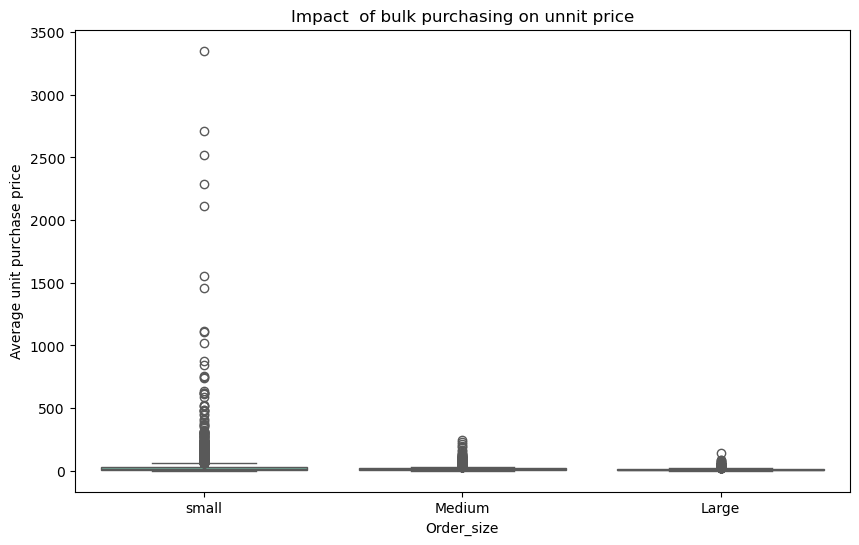

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Order_size', y='unit_purchaseprice',palette='Set2')
plt.title('Impact  of bulk purchasing on unnit price')
plt.xlabel('Order_size')
plt.ylabel('Average unit purchase price')
plt.show()


In [62]:
#Q5 Which vendors have low inventory turnover, indicating excess stock slow_moving products?
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
...,...
DISARONNO INTERNATIONAL LLC,0.975577
"PREMIUM PORT WINES, INC.",0.976077
TY KU LLC,0.976982
